## Import 所需要的東西

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import imdb

E:\Visual_2017\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
print("訓練資料總筆數 =", len(x_train))
print("測試資料總筆數 =", len(x_test))

訓練資料總筆數 = 25000
測試資料總筆數 = 25000


## 選取所需的文字長度
### *發現150是不夠讓測試資料正確率達到87%

In [6]:
from keras.preprocessing import sequence

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# 使用老師的Model

In [9]:
N=3 #文字要壓到N維
K=4 #LSTM有K個神經元

In [10]:
model = Sequential()
model.add(Embedding(10000, N))
model.add(LSTM(K))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_out1=model.fit(x_train, y_train,batch_size=128,epochs=5,verbose =1,validation_data = (x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 180s 7ms/step - loss: 0.6443 - acc: 0.6630 - val_loss: 0.5250 - val_acc: 0.7864
Epoch 2/5
25000/25000 [==============================] - 177s 7ms/step - loss: 0.4271 - acc: 0.8502 - val_loss: 0.4026 - val_acc: 0.8400
Epoch 3/5
25000/25000 [==============================] - 180s 7ms/step - loss: 0.3167 - acc: 0.8991 - val_loss: 0.3400 - val_acc: 0.8690
Epoch 4/5
25000/25000 [==============================] - 175s 7ms/step - loss: 0.2573 - acc: 0.9204 - val_loss: 0.3302 - val_acc: 0.8682
Epoch 5/5
25000/25000 [==============================] - 457s 18ms/step - loss: 0.2193 - acc: 0.9332 - val_loss: 0.6292 - val_acc: 0.7812


### *正確率無法達到87%，且會產生Overfitting

# 提升Input維度、LSTM且使用Dropout和Earlystop來解決overfitting，並且後面的NN多放一層

In [21]:
model2 = Sequential()
model2.add(Embedding(10000, 30))
model2.add(Dropout(0.5))
model2.add(LSTM(10))
model2.add(Dropout(0.5))
model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 30)          300000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 30)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                1640      
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dropout_9 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total para

In [22]:
EarlyStop = EarlyStopping(monitor='val_loss',verbose=2,patience=1)
model_out2=model2.fit(x_train, y_train,batch_size=32,epochs=10,validation_data = (x_test,y_test),callbacks=[EarlyStop])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 705s 28ms/step - loss: 0.5348 - acc: 0.7225 - val_loss: 0.3377 - val_acc: 0.8578
Epoch 2/10
25000/25000 [==============================] - 708s 28ms/step - loss: 0.3193 - acc: 0.8839 - val_loss: 0.3239 - val_acc: 0.8616
Epoch 3/10
25000/25000 [==============================] - 722s 29ms/step - loss: 0.3021 - acc: 0.8991 - val_loss: 0.3096 - val_acc: 0.8771
Epoch 4/10
25000/25000 [==============================] - 710s 28ms/step - loss: 0.2259 - acc: 0.9232 - val_loss: 0.3185 - val_acc: 0.8742
Epoch 00004: early stopping


### *有成功的達到87%

# 大幅度提升Embedding、LSTM、Relu的Dense

In [35]:
model3 = Sequential()
model3.add(Embedding(10000, 500))
model3.add(Dropout(0.5))
model3.add(LSTM(20))
model3.add(Dropout(0.5))
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 500)         5000000   
_________________________________________________________________
dropout_16 (Dropout)         (None, None, 500)         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                41680     
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                1050      
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total para

In [30]:
EarlyStop = EarlyStopping(monitor='val_loss',verbose=2,patience=1)
model_out3=model3.fit(x_train, y_train,batch_size=32,epochs=5,validation_data = (x_test,y_test),callbacks=[EarlyStop])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 1141s 46ms/step - loss: 0.4404 - acc: 0.8032 - val_loss: 0.3120 - val_acc: 0.8726
Epoch 2/5
25000/25000 [==============================] - 744s 30ms/step - loss: 0.2637 - acc: 0.9058 - val_loss: 0.3300 - val_acc: 0.8622
Epoch 00002: early stopping


### *增加了LSTM和Relu的Dense雖然很快就達到87%，但是還是有overfitting的存在。覺得LSTM數量越多，越容易產生 overfitting

In [31]:
score_2 = model3.evaluate(x_test, y_test)
score = model.evaluate(x_test, y_test)
score_1 = model2.evaluate(x_test, y_test)

25000/25000 [==============================] - 116s 5ms/step


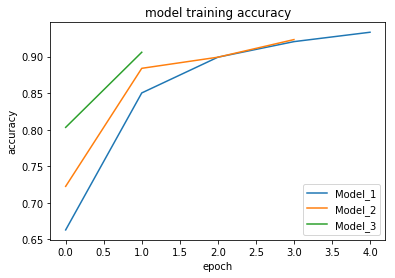

In [32]:
plt.plot(model_out1.history["acc"])
plt.plot(model_out2.history["acc"])
plt.plot(model_out3.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Model_1","Model_2","Model_3","Model_4"],loc="best")
plt.show()

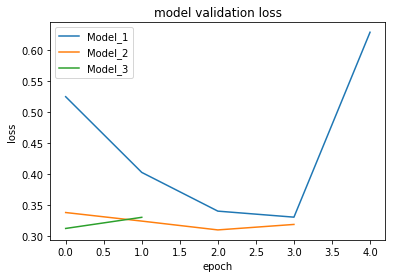

In [33]:
plt.plot(model_out1.history["val_loss"])
plt.plot(model_out2.history["val_loss"])
plt.plot(model_out3.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Model_1","Model_2","Model_3","Model_4"],loc="best")
plt.show()

In [34]:
print('Model_1測試資料的 loss:', score[0])
print('Model_1測試資料正確率:', score[1])
print('Model_2測試資料的 loss:', score_1[0])
print('Model_2測試資料正確率:', score_1[1])
print('Model_3測試資料的 loss:', score_2[0])
print('Model_3測試資料正確率:', score_2[1])


Model_1測試資料的 loss: 0.6292035572433472
Model_1測試資料正確率: 0.78116
Model_2測試資料的 loss: 0.3184727276945114
Model_2測試資料正確率: 0.8742
Model_3測試資料的 loss: 0.3299627842998505
Model_3測試資料正確率: 0.86216


# 結論

### 一開始測試的Model容易會卡在86%造成overfitting，後來多次測試才發現，雖然LSTM的多寡會造成overfitting，但maxlen的關係也很重要。
### 所以LSTM盡量少，maxlen盡量多，而batch_size不要超過50(雖然會跑到天荒地老)。